### 0. Setup

In [19]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import qiime2 as q2
from qiime2 import Visualization
import seaborn as sns
from scipy.stats import shapiro, kruskal, f_oneway


data_dir = 'data'

if not os.path.isdir(data_dir):
    os.makedirs(data_dir)
    
%matplotlib inline

In [2]:
#import filtered feature table from phylogeny
! wget -nv -O $data_dir/feature-table_filtered.qza 'https://polybox.ethz.ch/index.php/s/YD03e961xKim9Ix/download'
! wget -nv -O $data_dir/metadata.tsv 'https://polybox.ethz.ch/index.php/s/RVPyoVYUBeVQFrJ/download'
! wget -nv -O $data_dir/taxonomy_classification.qza 'https://polybox.ethz.ch/index.php/s/xI7QZ3djVFA9xPj/download'

2022-11-29 13:11:52 URL:https://polybox.ethz.ch/index.php/s/YD03e961xKim9Ix/download [1799985/1799985] -> "data/feature-table_filtered.qza" [1]
2022-11-29 13:11:53 URL:https://polybox.ethz.ch/index.php/s/RVPyoVYUBeVQFrJ/download [325995/325995] -> "data/metadata.tsv" [1]
2022-11-29 13:11:53 URL:https://polybox.ethz.ch/index.php/s/xI7QZ3djVFA9xPj/download [397963/397963] -> "data/taxonomy_classification.qza" [1]


In [3]:
#import feature table as pandas DF
data = q2.Artifact.load(f'{data_dir}/feature-table_filtered.qza').view(pd.DataFrame)
data.head()

,042c16e5b0f6444ef0466ba21a59fbd9,872a14c755bae7615bbfd082b4de20f9,35ffcc3b809d667286737d79670b8de5,118fbd65b0c5bdc8c2f12ef7099058aa,c6c3ab4e828fb40d6e05967b7aac9338,c180a36036d60eb85ccb62737d8e2ba0,c24e0e391aa836b5eae25567c7eb89ee,46953abeca4fce8a17c5dea8732f1611,8e175abe6a746b8f33bae9cd7c8192bb,315ca0a729f126b941ba111a16d4d97a,...,36f1f089e32373134ee77626ada1fbf0,78f2730a1c1c42f71e58763c6776ac77,ae290f0b0a5586b0cb783c2dfec83fa2,0f1803505db2f19f4b3067d768adf73b,b6645d333c70257fd3fe3dd42943189c,d01af41f6dac277a3feb79a1aa713c4b,9e27b12da68a87e509022323424d7b1b,c845eda99662b5a88a8c8e979ec07dd0,16abb37658f0d89cf9462696b61b312c,5f952448dbca288581e4b199a7db9178
ERR1309715,223.0,1537.0,141.0,320.0,935.0,3534.0,178.0,0.0,1852.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR1309716,19.0,3346.0,12.0,2256.0,2288.0,974.0,1815.0,0.0,599.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR1309717,246.0,3247.0,157.0,1203.0,2181.0,1202.0,830.0,0.0,636.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR1309718,203.0,536.0,114.0,1306.0,310.0,2558.0,780.0,0.0,1245.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR1309719,301.0,1527.0,223.0,202.0,923.0,2819.0,148.0,0.0,1511.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1. Seaborn violin plot to check the distribution

Check the distribution of 20 samples, randomly picked from the original dataframe as an example.

In [7]:
n = 20

# draw n ASVs out of the original DataFrame
data_samp = data.sample(n=n, axis=1, random_state=234)

# create a new DataFrame with three columns (sample, ASV, abundance)
col_names = {'level_0': 'sample', 'level_1': 'asv', 0: 'count'}
data_plot = data_samp.stack().reset_index().rename(columns=col_names)

# make sure the shape is correct (no. of rows should be equal to the size of our random 
# sample multiplied by number of samples)
assert data_plot.shape[0] == n * data_samp.shape[0], 'The new DataFrame has an incorrect no. of rows.'

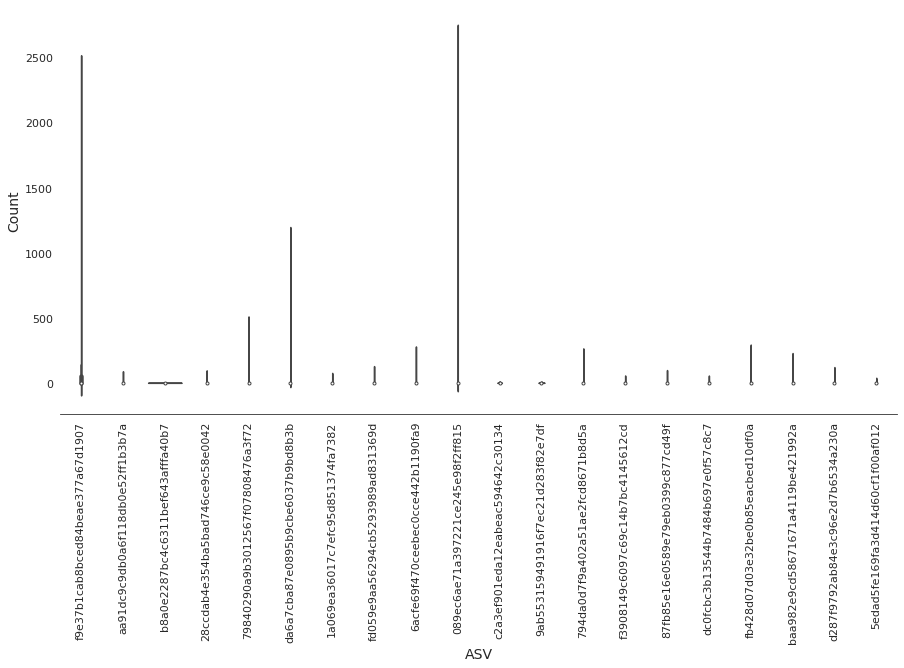

In [9]:
with sns.axes_style('white'), sns.color_palette('Set1'):
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 7.5)
    
    sns.violinplot(data=data_plot, x='asv', y='count', ax=ax)
    sns.despine(left=True)
    
    # adjust tick labels and axes titles
    ax.tick_params(axis='x', rotation=90, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.set_xlabel('ASV', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)

It is clearly visible that samples are not normally distributed. Use ANCOM to check differential abundance. 

### 2. ANCOM 

What we want to look at:  
- Weaning: True vs. False 
- Weaning: True vs. missing values
- Diet: breast feeding vs. formula diet 
- Diet: breast feeding & formula diet vs. no milk 
- Age: Months 2 vs Months 12
- Age: Months 15 vs months 30 
- Age: Months 30 vs. months 35



**Filter feature table**

In [14]:
#Filter feature table to only retain features that contain information on the genus level.
! qiime taxa filter-table \
    --i-table $data_dir/feature-table_filtered.qza \
    --i-taxonomy $data_dir/taxonomy_classification.qza \
    --p-mode contains \
    --p-include g__ \
    --p-exclude 'g__;,Chloroplast,Mitochondria' \
    --o-filtered-table $data_dir/filtered-table-ex.qza

Saved FeatureTable[Frequency] to: data/filtered-table-ex.qza


#### 2.1 Weaning True vs. False
##### 2.1.1 True vs. False

Differencial abundances of **species** in samples weaning = True vs. False

In [15]:
! qiime taxa collapse \
    --i-table $data_dir/filtered-table-ex.qza \
    --i-taxonomy $data_dir/taxonomy_classification.qza \
    --p-level 6 \
    --o-collapsed-table $data_dir/table_g_l6.qza

Saved FeatureTable[Frequency] to: data/table_g_l6.qza


In [16]:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_g_l6.qza \
    --m-metadata-file $data_dir/metadata.tsv \
    --p-where "[diet_weaning]='True' or [diet_weaning]='False'" \
    --o-filtered-table $data_dir/table_l6_weaning.qza

Saved FeatureTable[Frequency] to: data/table_l6_weaning.qza


In [17]:
! qiime composition add-pseudocount \
    --i-table $data_dir/table_l6_weaning.qza \
    --o-composition-table $data_dir/table_comp_l6_weaning.qza

Saved FeatureTable[Composition] to: data/table_comp_l6_weaning.qza


In [18]:
! qiime composition ancom \
    --i-table $data_dir/table_comp_l6_weaning.qza \
    --m-metadata-file $data_dir/metadata.tsv \
    --m-metadata-column diet_weaning \
    --o-visualization $data_dir/ancom_weaning_l6.qzv

Saved Visualization to: data/ancom_weaning_l6.qzv


In [ ]:
Visualization.load(f'{data_dir}/ancom_weaning_l6.qzv')

##### 2.1.2 Weaning True vs. Missing value

Differencial abundances of **species** in samples weaning = True vs. missing value

In [9]:
#Filtering metadata table for weaning = True & weaning = missing data -> replace empty space with string to be able to run an ANCOM test 
meta = pd.read_csv('data/metadata.tsv', sep='\t') 
meta_wean = meta
meta_wean['diet_weaning'] = meta['diet_weaning'].fillna('missing value')  
meta_wean.to_csv(data_dir+'/metadata_wean.tsv', index = False, sep='\t')

In [20]:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_g_l6.qza \
    --m-metadata-file $data_dir/metadata_wean.tsv \
    --p-where "[diet_weaning]='True' or [diet_weaning]='missing value'" \
    --o-filtered-table $data_dir/table_l6_wean.qza

Saved FeatureTable[Frequency] to: data/table_l6_wean.qza


In [21]:
! qiime composition add-pseudocount \
    --i-table $data_dir/table_l6_wean.qza \
    --o-composition-table $data_dir/table_comp_l6_wean.qza

Saved FeatureTable[Composition] to: data/table_comp_l6_wean.qza


In [22]:
! qiime composition ancom \
    --i-table $data_dir/table_comp_l6_wean.qza \
    --m-metadata-file $data_dir/metadata_wean.tsv \
    --m-metadata-column diet_weaning \
    --o-visualization $data_dir/ancom_wean_l6.qzv

Saved Visualization to: data/ancom_wean_l6.qzv


In [ ]:
Visualization.load(f'{data_dir}/ancom_wean_l6.qzv')

##### 2.1.3 Weaning False vs. missing data

Differencial abundances of **species** in samples weaning = False vs. missing value

In [24]:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_g_l6.qza \
    --m-metadata-file $data_dir/metadata_wean.tsv \
    --p-where "[diet_weaning]='False' or [diet_weaning]='missing value'" \
    --o-filtered-table $data_dir/table_l6_weanF.qza

Saved FeatureTable[Frequency] to: data/table_l6_weanF.qza


In [25]:
! qiime composition add-pseudocount \
    --i-table $data_dir/table_l6_weanF.qza \
    --o-composition-table $data_dir/table_comp_l6_weanF.qza

Saved FeatureTable[Composition] to: data/table_comp_l6_weanF.qza


In [26]:
! qiime composition ancom \
    --i-table $data_dir/table_comp_l6_weanF.qza \
    --m-metadata-file $data_dir/metadata_wean.tsv \
    --m-metadata-column diet_weaning \
    --o-visualization $data_dir/ancom_weanF_l6.qzv

Saved Visualization to: data/ancom_weanF_l6.qzv


In [ ]:
Visualization.load(f'{data_dir}/ancom_weanF_l6.qzv')

#### 2.2 Diet 
##### 2.2.1 Breast milk vs. formula milk

Differencial abundances of **species** in samples diet_milk = bd vs. fd

In [28]:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_g_l6.qza \
    --m-metadata-file $data_dir/metadata.tsv \
    --p-where "[diet_milk]='bd' or [diet_milk]='fd'" \
    --o-filtered-table $data_dir/table_l6_bd_fd.qza

Saved FeatureTable[Frequency] to: data/table_l6_bd_fd.qza


In [29]:
! qiime composition add-pseudocount \
    --i-table $data_dir/table_l6_bd_fd.qza \
    --o-composition-table $data_dir/table_comp_l6_bd_fd.qza

Saved FeatureTable[Composition] to: data/table_comp_l6_bd_fd.qza


In [16]:
! qiime composition ancom \
    --i-table $data_dir/table_comp_l6_bd_fd.qza \
    --m-metadata-file $data_dir/metadata.tsv \
    --m-metadata-column diet_milk \
    --p-transform-function log \
    --o-visualization $data_dir/ancom_l6_bd_fd.qzv

Saved Visualization to: data/ancom_l6_bd_fd.qzv


In [14]:
Visualization.load(f'{data_dir}/ancom_l6_bd_fd.qzv')

<visualization: Visualization uuid: 138b2d2b-8841-4054-a2da-aba9672dc689>

In [20]:
#Creating a folder for figures
data_output = 'data_out'

if not os.path.isdir(data_output):
    os.makedirs(data_output)

In [21]:
#Extracting the ancom output
! qiime tools extract \
    --input-path $data_dir/ancom_l6_bd_fd.qzv \
    --output-path $data_output/ancom_bd_fd

Extracted data/ancom_l6_bd_fd.qzv to directory data_out/ancom_bd_fd/138b2d2b-8841-4054-a2da-aba9672dc689


In [49]:
#ancom into dataset
ancombdfd = pd.read_csv(f'{data_output}/ancom_bd_fd/138b2d2b-8841-4054-a2da-aba9672dc689/data/data.tsv', sep='\t')
ancombd_fd = pd.read_csv(f'{data_output}/ancom_bd_fd/138b2d2b-8841-4054-a2da-aba9672dc689/data/ancom.tsv', sep='\t')
ancombd_fd.rename(columns = {'Unnamed: 0':'id'}, inplace = True)

In [50]:
ancomDataSigbd_fd = ancombdfd.merge(ancombd_fd, how='inner')
ancomDataSigbd_fd

,id,log,W,Reject null hypothesis
0,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,-0.803063,124,True
1,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,0.006584,23,False
2,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,0.003309,23,False
3,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,-0.213722,34,False
4,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,0.039157,21,False
...,...,...,...,...
123,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,-0.010031,21,False
124,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,-0.006921,21,False
125,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,-0.080080,41,False
126,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,0.004016,21,False


In [24]:
ancomDataSigbd_fd.sort_values(by= 'W', axis = 0, ascending = True)

,id,log,W,Reject null hypothesis
75,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,0.844226,4,False
57,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,0.605061,8,False
20,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,1.097106,8,False
54,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,0.359080,13,False
12,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,-0.099184,13,False
...,...,...,...,...
77,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,1.823635,114,True
0,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,-0.803063,124,True
35,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,-1.009486,126,True
50,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,2.846349,127,True


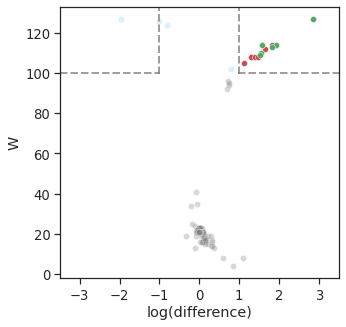

In [55]:
#Create a figure for the report 
sns.set(rc={'figure.figsize':(5, 5)}, style='white')
with sns.plotting_context("notebook", font_scale=1.2):
    ax = sns.scatterplot(
        data= ancomDataSigbd_fd[(ancomDataSigbd_fd['Reject null hypothesis'] == False)], 
        x='log', 
        y='W',
        color='grey',
        alpha=.3
    )
    ax = sns.scatterplot(
        data=ancomDataSigbd_fd[(ancomDataSigbd_fd['Reject null hypothesis'] == True) & (ancomDataSigbd_fd['log']<1)], 
        x='log', 
        y='W',
        color='lightskyblue',
        alpha=.3
    )
    ax = sns.scatterplot(
        data=ancomDataSigbd_fd[(ancomDataSigbd_fd['Reject null hypothesis'] == True) & (ancomDataSigbd_fd['log']>=1)], 
        x='log', 
        y='W',
        color='r'
    )
    ax = sns.scatterplot(
        data=ancomDataSigbd_fd[(ancomDataSigbd_fd['Reject null hypothesis'] == True) & (ancomDataSigbd_fd['id'].str.contains('f__Lachnospiraceae'))], 
        x='log', 
        y='W',
        color='g'
    )
ax.tick_params(axis='x', which='major', bottom=True)
ax.tick_params(axis='y', which='major', left=True)
ax.set_xlim(-3.5,3.5)
#ax.set_ylim(-5,5200)
#ax.set_yscale('log')
ax.set_xlabel('log(difference)')
ax.axhline(y=100, xmin=0, xmax=.36, color="grey", dashes=(5, 2))
ax.axhline(y=100, xmin=.64, xmax=1, color="grey", dashes=(5, 2))
ax.axvline(x=1, ymin=0.75, ymax=1, color="grey", dashes=(5, 2))
ax.axvline(x=-1, ymin=0.75, ymax=1, color="grey", dashes=(5, 2))
ax.set_ylabel('W')
#plt.savefig(f'{data_output}/Vulcano_ancom_bd_fd_600dpi.png', bbox_inches='tight', dpi=600)

##### 2.2.2 Breast & formula milk vs. no milk

**2.2.2.1** Differencial abundances of **species** in samples diet_milk = bd vs. no milk

In [32]:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_g_l6.qza \
    --m-metadata-file $data_dir/metadata.tsv \
    --p-where "[diet_milk]='bd' or [diet_milk]='no milk'" \
    --o-filtered-table $data_dir/table_l6_bd_nm.qza

Saved FeatureTable[Frequency] to: data/table_l6_bd_nm.qza


In [33]:
! qiime composition add-pseudocount \
    --i-table $data_dir/table_l6_bd_nm.qza \
    --o-composition-table $data_dir/table_comp_l6_bd_nm.qza

Saved FeatureTable[Composition] to: data/table_comp_l6_bd_nm.qza


In [34]:
! qiime composition ancom \
    --i-table $data_dir/table_comp_l6_bd_nm.qza \
    --m-metadata-file $data_dir/metadata.tsv \
    --m-metadata-column diet_milk \
    --o-visualization $data_dir/ancom_l6_bd_nm.qzv

Saved Visualization to: data/ancom_l6_bd_nm.qzv


In [9]:
Visualization.load(f'{data_dir}/ancom_l6_bd_nm.qzv')

<visualization: Visualization uuid: 70252776-7202-45d2-aa8e-6d8efbef5610>

**2.2.2.2** Differencial abundances of **species** in samples diet_milk = fd vs. no milk

In [36]:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_g_l6.qza \
    --m-metadata-file $data_dir/metadata.tsv \
    --p-where "[diet_milk]='fd' or [diet_milk]='no milk'" \
    --o-filtered-table $data_dir/table_l6_fd_nm.qza

Saved FeatureTable[Frequency] to: data/table_l6_fd_nm.qza


In [37]:
! qiime composition add-pseudocount \
    --i-table $data_dir/table_l6_fd_nm.qza \
    --o-composition-table $data_dir/table_comp_l6_fd_nm.qza

Saved FeatureTable[Composition] to: data/table_comp_l6_fd_nm.qza


In [38]:
! qiime composition ancom \
    --i-table $data_dir/table_comp_l6_fd_nm.qza \
    --m-metadata-file $data_dir/metadata.tsv \
    --m-metadata-column diet_milk \
    --o-visualization $data_dir/ancom_l6_fd_nm.qzv

Saved Visualization to: data/ancom_l6_fd_nm.qzv


In [10]:
Visualization.load(f'{data_dir}/ancom_l6_fd_nm.qzv')

<visualization: Visualization uuid: 5f849a7b-f068-4711-9780-1bbeefa254ce>

Only the abundance of 3 species is significantly different between fd and no milk

#### 2.3 Age comparison
##### 2.3.1) 2.0 vs. 12.0

Differencial abundances of **species** in samples age_months = 2.0 vs. 12 (developmental phase)

In [8]:
#Filtering metadata table to get categorial data for "age_months" as composition ancom is not working with numerical data
meta = pd.read_csv('data/metadata.tsv', sep='\t') 
meta['age_months'].replace(2.0, 'two', inplace = True)
meta['age_months'].replace(12.0, 'twelve', inplace = True)
meta_filt = meta[((meta.age_months == "two") | (meta.age_months == "twelve"))] 
meta_filt.to_csv(data_dir+'/metadata_1.tsv', index = False, sep='\t')

In [40]:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_g_l6.qza \
    --m-metadata-file $data_dir/metadata_1.tsv \
    --p-where "[age_months]='two' or [age_months]='twelve'" \
    --o-filtered-table $data_dir/table_l6_age.qza

Saved FeatureTable[Frequency] to: data/table_l6_age.qza


In [41]:
! qiime composition add-pseudocount \
    --i-table $data_dir/table_l6_age.qza \
    --o-composition-table $data_dir/table_comp_l6_age.qza

Saved FeatureTable[Composition] to: data/table_comp_l6_age.qza


In [17]:
meta1 = pd.read_csv('data/metadata_1.tsv', sep='\t') 

In [29]:
! qiime composition ancom \
    --i-table $data_dir/table_comp_l6_age.qza \
    --m-metadata-file $data_dir/metadata_1.tsv \
    --m-metadata-column age_months \
    --p-transform-function log \
    --o-visualization $data_dir/ancom_l6_age.qzv

Saved Visualization to: data/ancom_l6_age.qzv


In [2]:
Visualization.load(f'{data_dir}/ancom_l6_age.qzv') #16

<visualization: Visualization uuid: 031e11ca-da10-4756-8e4a-3c85c4ba76d0>

In [23]:
len(meta[meta['age_months'] == 2.0])

54

In [24]:
len(meta[meta['age_months'] == 12.0])

60

##### 2.3.2) 15.0 vs. 30.0

Differencial abundances of **species** in samples age_months = 15 vs. 30 (transitional phase)

In [6]:
#Filtering metadata table to get categorial data for "age_months" as composition ancom is not working with numerical data
meta = pd.read_csv('data/metadata.tsv', sep='\t') 
meta['age_months'].replace(15.0, 'fifteen', inplace = True)
meta['age_months'].replace(30.0, 'thirty', inplace = True)
meta_filt2 = meta[((meta.age_months == "fifteen") | (meta.age_months == "thirty"))] 
meta_filt2.to_csv(data_dir+'/metadata_2.tsv', index = False, sep='\t')

In [44]:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_g_l6.qza \
    --m-metadata-file $data_dir/metadata_2.tsv \
    --p-where "[age_months]='fifteen' or [age_months]='thirty'" \
    --o-filtered-table $data_dir/table_l6_age2.qza

Saved FeatureTable[Frequency] to: data/table_l6_age2.qza


In [45]:
! qiime composition add-pseudocount \
    --i-table $data_dir/table_l6_age2.qza \
    --o-composition-table $data_dir/table_comp_l6_age2.qza

Saved FeatureTable[Composition] to: data/table_comp_l6_age2.qza


In [30]:
! qiime composition ancom \
    --i-table $data_dir/table_comp_l6_age2.qza \
    --m-metadata-file $data_dir/metadata_2.tsv \
    --m-metadata-column age_months \
    --p-transform-function log \
    --o-visualization $data_dir/ancom_l6_age2.qzv

Saved Visualization to: data/ancom_l6_age2.qzv


In [3]:
Visualization.load(f'{data_dir}/ancom_l6_age2.qzv') #2

<visualization: Visualization uuid: d9132894-e2da-430e-b81e-d738619cc42d>

In [25]:
len(meta[meta['age_months'] == 15.0])

60

In [26]:
len(meta[meta['age_months'] == 30.0])

16

##### 2.3.3) 31.0 vs. 35.0

Differencial abundances of **species** in samples age_months = 31 vs. 35 (stable phase)

In [14]:
meta = pd.read_csv('data/metadata.tsv', sep='\t') 
meta["age_months"].max()

37.0

In [15]:
#Filtering metadata table to get categorial data for "age_months" as composition ancom is not working with numerical data
meta = pd.read_csv('data/metadata.tsv', sep='\t') 
meta['age_months'].replace(31.0, 'thirty-one', inplace = True)
meta['age_months'].replace(35.0, 'thirty-five', inplace = True)
meta_filt3 = meta[((meta.age_months == "thirty-one") | (meta.age_months == "thirty-five"))] 
meta_filt3.to_csv(data_dir+'/metadata_3.tsv', index = False, sep='\t')

In [50]:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_g_l6.qza \
    --m-metadata-file $data_dir/metadata_3.tsv \
    --p-where "[age_months]='thirty-one' or [age_months]='thirty-five'" \
    --o-filtered-table $data_dir/table_l6_age3.qza

Saved FeatureTable[Frequency] to: data/table_l6_age3.qza


In [51]:
! qiime composition add-pseudocount \
    --i-table $data_dir/table_l6_age3.qza \
    --o-composition-table $data_dir/table_comp_l6_age3.qza

Saved FeatureTable[Composition] to: data/table_comp_l6_age3.qza


In [31]:
! qiime composition ancom \
    --i-table $data_dir/table_comp_l6_age3.qza \
    --m-metadata-file $data_dir/metadata_3.tsv \
    --m-metadata-column age_months \
    --p-transform-function log \
    --o-visualization $data_dir/ancom_l6_age3.qzv

Saved Visualization to: data/ancom_l6_age3.qzv


In [ ]:
Visualization.load(f'{data_dir}/ancom_l6_age3.qzv') #0

In [27]:
len(meta[meta['age_months'] == 31.0])

17

In [28]:
len(meta[meta['age_months'] == 35.0])

10

In [32]:
#Extracting the ancom output: Months 2 vs. 12
! qiime tools extract \
    --input-path $data_dir/ancom_l6_age.qzv \
    --output-path $data_output/ancom_2_12

#Months 15 vs. 30 
! qiime tools extract \
    --input-path $data_dir/ancom_l6_age2.qzv \
    --output-path $data_output/ancom_15_30

#Months 31 vs. 35
! qiime tools extract \
    --input-path $data_dir/ancom_l6_age3.qzv \
    --output-path $data_output/ancom_31_35

Extracted data/ancom_l6_age.qzv to directory data_out/ancom_2_12/639d83c8-d160-4d19-bd77-8e56a92af803
Extracted data/ancom_l6_age2.qzv to directory data_out/ancom_15_30/a22194d9-d1d2-43fd-b524-a0a194250acf
Extracted data/ancom_l6_age3.qzv to directory data_out/ancom_31_35/9aac81d4-1fc5-4cf5-9239-08b7f2e22089


In [33]:
#2 vs. 12
ancom212 = pd.read_csv(f'{data_output}/ancom_2_12/639d83c8-d160-4d19-bd77-8e56a92af803/data/data.tsv', sep='\t')
ancom_2_12 = pd.read_csv(f'{data_output}/ancom_2_12/639d83c8-d160-4d19-bd77-8e56a92af803/data/ancom.tsv', sep='\t')
ancom_2_12.rename(columns = {'Unnamed: 0':'id'}, inplace = True)

#15 vs. 30
ancom1530 = pd.read_csv(f'{data_output}/ancom_15_30/a22194d9-d1d2-43fd-b524-a0a194250acf/data/data.tsv', sep='\t')
ancom_15_30 = pd.read_csv(f'{data_output}/ancom_15_30/a22194d9-d1d2-43fd-b524-a0a194250acf/data/ancom.tsv', sep='\t')
ancom_15_30.rename(columns = {'Unnamed: 0':'id'}, inplace = True)

#31 vs. 35
ancom3135 = pd.read_csv(f'{data_output}/ancom_31_35/9aac81d4-1fc5-4cf5-9239-08b7f2e22089/data/data.tsv', sep='\t')
ancom_31_35 = pd.read_csv(f'{data_output}/ancom_31_35/9aac81d4-1fc5-4cf5-9239-08b7f2e22089/data/ancom.tsv', sep='\t')
ancom_31_35.rename(columns = {'Unnamed: 0':'id'}, inplace = True)

In [34]:
ancomDataSig2_12 = ancom212.merge(ancom_2_12, how='inner')
ancomDataSig2_12

ancomDataSig15_30 = ancom1530.merge(ancom_15_30, how='inner')
ancomDataSig15_30

ancomDataSig31_35 = ancom3135.merge(ancom_31_35, how='inner')
ancomDataSig31_35

,id,log,W,Reject null hypothesis
0,k__Archaea;p__Euryarchaeota;c__Methanobacteria...,-0.180835,0,False
1,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,-0.171181,0,False
2,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,-0.138629,0,False
3,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,-0.143093,0,False
4,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,0.064624,0,False
...,...,...,...,...
65,k__Bacteria;p__Proteobacteria;c__Betaproteobac...,1.006523,0,False
66,k__Bacteria;p__Proteobacteria;c__Deltaproteoba...,0.939766,0,False
67,k__Bacteria;p__Proteobacteria;c__Deltaproteoba...,-0.557595,0,False
68,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,0.260636,0,False


Text(0, 0.5, 'W')

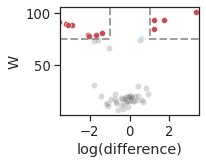

In [41]:
#Create a figure for the report: Months 2 vs. 12
sns.set(rc={'figure.figsize':(2.5, 2)}, style='white')
with sns.plotting_context("notebook", font_scale=1.2):
    ax = sns.scatterplot(
        data= ancomDataSig2_12[(ancomDataSig2_12['Reject null hypothesis'] == False)], 
        x='log', 
        y='W',
        color='grey',
        alpha=.3
    )
    ax = sns.scatterplot(
        data=ancomDataSig2_12[(ancomDataSig2_12['Reject null hypothesis'] == True) & (ancomDataSig2_12['log']<1)], 
        x='log', 
        y='W',
        color='lightskyblue',
        alpha=.3
    )
    ax = sns.scatterplot(
        data=ancomDataSig2_12[(ancomDataSig2_12['Reject null hypothesis'] == True) & (ancomDataSig2_12['log']>=1)], 
        x='log', 
        y='W',
        color='r'
    )
    ax = sns.scatterplot(
        data=ancomDataSig2_12[(ancomDataSig2_12['Reject null hypothesis'] == True) & (ancomDataSig2_12['log']<= -1)], 
        x='log', 
        y='W',
        color='r'
    )
ax.tick_params(axis='x', which='major', bottom=True)
ax.tick_params(axis='y', which='major', left=True)
ax.set_xlim(-3.5,3.5)
#ax.set_ylim(-5,5200)
#ax.set_yscale('log')
ax.set_xlabel('log(difference)')
ax.axhline(y=75, xmin=0, xmax=.36, color="grey", dashes=(5, 2))
ax.axhline(y=75, xmin=.64, xmax=1, color="grey", dashes=(5, 2))
ax.axvline(x=1, ymin=0.73, ymax=1, color="grey", dashes=(5, 2))
ax.axvline(x=-1, ymin=0.73, ymax=1, color="grey", dashes=(5, 2))
ax.set_ylabel('W')
#plt.savefig(f'{data_output}/Vulcano_ancom_bd_fd_600dpi.png', bbox_inches='tight', dpi=600)

Text(0, 0.5, ' ')

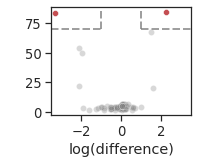

In [60]:
#Create a figure for the report: Months 15 vs. 30
sns.set(rc={'figure.figsize':(2.5, 2)}, style='white')
with sns.plotting_context("notebook", font_scale=1.2):
    ax = sns.scatterplot(
        data= ancomDataSig15_30[(ancomDataSig15_30['Reject null hypothesis'] == False)], 
        x='log', 
        y='W',
        color='grey',
        alpha=.3
    )
    ax = sns.scatterplot(
        data= ancomDataSig15_30[(ancomDataSig15_30['Reject null hypothesis'] == True) & (ancomDataSig15_30['log']<1)], 
        x='log', 
        y='W',
        color='lightskyblue',
        alpha=.3
    )
    ax = sns.scatterplot(
        data=ancomDataSig15_30[(ancomDataSig15_30['Reject null hypothesis'] == True) & (ancomDataSig15_30['log']>=1)], 
        x='log', 
        y='W',
        color='r'
    )
    ax = sns.scatterplot(
        data=ancomDataSig15_30[(ancomDataSig15_30['Reject null hypothesis'] == True) & (ancomDataSig15_30['log']<= -1)], 
        x='log', 
        y='W',
        color='r'
    )
ax.tick_params(axis='x', which='major', bottom=True)
ax.tick_params(axis='y', which='major', left=True)
ax.set_xlim(-3.5,3.5)
#ax.set_ylim(-5,5200)
#ax.set_yscale('log')
ax.set_xlabel('log(difference)')
ax.axhline(y=70, xmin=0, xmax=.36, color="grey", dashes=(5, 2))
ax.axhline(y=70, xmin=.64, xmax=1, color="grey", dashes=(5, 2))
ax.axvline(x=1, ymin=0.79, ymax=1, color="grey", dashes=(5, 2))
ax.axvline(x=-1, ymin=0.79, ymax=1, color="grey", dashes=(5, 2))
ax.set_ylabel(' ')
#plt.savefig(f'{data_output}/Vulcano_ancom_bd_fd_600dpi.png', bbox_inches='tight', dpi=600)

Text(0, 0.5, 'W')

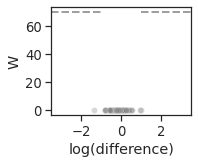

In [59]:
#Create a figure for the report: Months 15 vs. 30
sns.set(rc={'figure.figsize':(2.5, 2)}, style='white')
with sns.plotting_context("notebook", font_scale=1.2):
    ax = sns.scatterplot(
        data= ancomDataSig31_35[(ancomDataSig31_35['Reject null hypothesis'] == False)], 
        x='log', 
        y='W',
        color='grey',
        alpha=.3
    )
    ax = sns.scatterplot(
        data= ancomDataSig31_35[(ancomDataSig31_35['Reject null hypothesis'] == True) & (ancomDataSig31_35['log']<1)], 
        x='log', 
        y='W',
        color='lightskyblue',
        alpha=.3
    )
    ax = sns.scatterplot(
        data=ancomDataSig31_35[(ancomDataSig31_35['Reject null hypothesis'] == True) & (ancomDataSig31_35['log']>=1)], 
        x='log', 
        y='W',
        color='r'
    )
    ax = sns.scatterplot(
        data=ancomDataSig31_35[(ancomDataSig31_35['Reject null hypothesis'] == True) & (ancomDataSig31_35['log']<= -1)], 
        x='log', 
        y='W',
        color='r'
    )
ax.tick_params(axis='x', which='major', bottom=True)
ax.tick_params(axis='y', which='major', left=True)
ax.set_xlim(-3.5,3.5)
#ax.set_ylim(-5,5200)
#ax.set_yscale('log')
ax.set_xlabel('log(difference)')
ax.axhline(y=70, xmin=0, xmax=.36, color="grey", dashes=(5, 2))
ax.axhline(y=70, xmin=.64, xmax=1, color="grey", dashes=(5, 2))
#ax.axvline(x=1, ymin=0.79, ymax=1, color="grey", dashes=(5, 2))
#ax.axvline(x=-1, ymin=0.79, ymax=1, color="grey", dashes=(5, 2))
ax.set_ylabel('W')
#plt.savefig(f'{data_output}/Vulcano_ancom_bd_fd_600dpi.png', bbox_inches='tight', dpi=600)